<hr>
<h3>Rango de una matriz</h3>


El rango de una matriz es el número máximo de columnas (filas respectivamente) que son linealmente independientes. El rango fila y el rango columna siempre son iguales: este número es llamado simplemente rango de A. Comúnmente se expresa como $rg(A)$. En Python nos apoyaremos de la sublibrería <code>linalg</code> de <code>numpy</code> y de la función <code>matrix_rank</code> para poder conocer el rango de una matriz.

<h4>Dependencia Lineal</h4>

Se dice que un conjunto de  $n$  vectores son linealmente dependientes si existen escalares  $\alpha_{i}$  no todos cero, tales que:

$$\alpha_1\vec{x_1} +  \alpha_2\vec{x_2} + \cdots + \alpha_n\vec{x_n} = 0$$

tomemos por ejemplo los renglones de la matriz $A$:

$$A_3 = 
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{bmatrix}
$$

Si tomamos $\alpha_1 = 1$, $\alpha_2 = -2$ y $\alpha_3 = 1$ vemos que se cumple que:

$$
\begin{bmatrix}
1\\
2\\
3\\
\end{bmatrix}
-
2
\begin{bmatrix}
4\\
5\\
6\\
\end{bmatrix}
+
\begin{bmatrix}
7\\
8\\
9\\
\end{bmatrix}
= 0
$$
 

El rango de una matriz nos puede ayudar a saber si un sistema de ecuaciones tiene solución, utilizando el siguiente teorema:

- Un sistema de m ecuaciones con n incógnitas $AX = B$ tiene solución si y solo si $rg(A) = rg(A|B) = r$, y en este caso si $r = n$, entonces el sistema tiene una única solución, y si $r < n$ el sistema tiene infinitas soluciones.

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [2]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [3]:
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [4]:
np.linalg.matrix_rank(a)

2

In [5]:
A = Matrix(a)

In [6]:
A

Matrix([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])

In [7]:
A.rank()

2

In [8]:
dir(A)

['C',
 'D',
 'H',
 'LDLdecomposition',
 'LDLsolve',
 'LUdecomposition',
 'LUdecompositionFF',
 'LUdecomposition_Simple',
 'LUsolve',
 'QRdecomposition',
 'QRsolve',
 'T',
 '__abs__',
 '__add__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rsub__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_class_priority',
 '_diff_wrt',
 '_dod_to_DomainMatrix',
 '_eval_Abs',
 '_eval_Mod',
 '_eval_add',
 '_eval_adjoint',
 '_eval_applyfunc',
 '_eval_as_real_imag',
 '_eval_atom

In [9]:
help(A.adjugate)

Help on method adjugate in module sympy.matrices.matrices:

adjugate(method='berkowitz') method of sympy.matrices.dense.MutableDenseMatrix instance
    Returns the adjugate, or classical adjoint, of
    a matrix.  That is, the transpose of the matrix of cofactors.
    
    https://en.wikipedia.org/wiki/Adjugate
    
    Parameters
    
    method : string, optional
        Method to use to find the cofactors, can be "bareiss", "berkowitz" or
        "lu".
    
    Examples
    
    >>> from sympy import Matrix
    >>> M = Matrix([[1, 2], [3, 4]])
    >>> M.adjugate()
    Matrix([
    [ 4, -2],
    [-3,  1]])
    
    See Also
    
    cofactor_matrix
    sympy.matrices.common.MatrixCommon.transpose



<h2>Sistemas de ecuaciones</h2>

Otra aplicación que le podemos dar a las matrices y a sus determinantes es al resolver sistemas de ecuaciones, los sistemas de ecuaciones los podremos clasificar en 3 tipos según si estos tienen una (determinados), infinitas (indeterminados), o ninguna (incompatibles) tomemos como ejemplo el siguiente sistema:

$$
\begin{eqnarray}
3x + 2y + z  = 1 \\
5x + 3y + 4z = 2 \\
x + y - z = 1
\nonumber
\end{eqnarray}
$$


Dicho sistema lo podremos expresar de forma matricial de la siguiente forma:

$$
\begin{bmatrix}
3 & 2 & 1 \\
5 & 3 & 4 \\
1 & 1 & -1 \\
\end{bmatrix}
\begin{bmatrix}
x\\
y\\
z\\
\end{bmatrix}
= 
\begin{bmatrix}
1\\
2\\
1\\
\end{bmatrix}
$$

$$A X = B$$


A la matriz $A$ la llamaremos matriz del sistema, y definiremos la matriz aumentada $AB$ como la matriz que tiene las mismas columnas de $A$, más los elementos de $B$ como una columna adicional:

$$
AB =
\begin{bmatrix}
3 & 2 & 1 & 1\\
5 & 3 & 4 & 2 \\
1 & 1 & -1 & 1 \\
\end{bmatrix}
$$

recordemos que podemos saber si un sistema tiene solución usando el siguiente teorema:

- Un sistema de m ecuaciones con n incógnitas $AX = B$ tiene solución si y solo si $rg(A) = rg(A|B) = r$, y en este caso si $r = n$, entonces el sistema tiene una única solución, y si $r < n$ el sistema tiene infinitas soluciones.








In [27]:
a = np.array([[3, 2, 1], [5, 3, 4], [1, 1, -1]])

In [10]:
A = Matrix([[3, 2, 1], [5, 3, 4], [1, 1, -1]])

In [11]:
A

Matrix([
[3, 2,  1],
[5, 3,  4],
[1, 1, -1]])

In [15]:
x, y, z = symbols('x, y, z')
X = Matrix([x, y, z])

In [16]:
X

Matrix([
[x],
[y],
[z]])

In [17]:
A * X

Matrix([
[  3*x + 2*y + z],
[5*x + 3*y + 4*z],
[      x + y - z]])

In [28]:
a

array([[ 3,  2,  1],
       [ 5,  3,  4],
       [ 1,  1, -1]])

In [39]:
b = np.array([1, 2.0, 1])

In [40]:
b

array([1., 2., 1.])

In [61]:
ab = np.column_stack([a, b])

In [62]:
ab

array([[ 3.,  2.,  1.,  1.],
       [ 5.,  3.,  4.,  2.],
       [ 1.,  1., -1.,  1.]])

In [63]:
Matrix(ab)

Matrix([
[3.0, 2.0,  1.0, 1.0],
[5.0, 3.0,  4.0, 2.0],
[1.0, 1.0, -1.0, 1.0]])

In [64]:
np.linalg.matrix_rank(a)

3

In [65]:
np.linalg.matrix_rank(ab)

3

In [76]:
A.shape

(3, 3)

In [69]:
a.shape

(3, 3)

In [70]:
import pandas as pd

In [72]:
df = pd.DataFrame(a)

In [74]:
df.shape

(3, 3)

In [77]:
np.linalg.matrix_rank(a) 

3

In [79]:
a.shape[1]

3

¿Mutable o Inmutable?

- Mutables:
    - Listas
    - Arrays (Numpy)
    - Diccionarios
    - DataFrames (Pandas)
    - Mutables

- Inmutables:
    - Tuplas
    - Int
    - Float
    - Cadenas

In [81]:
array = b.copy()

In [84]:
array[0] = 5

In [85]:
array

array([5., 2., 1.])

In [86]:
b

array([1., 2., 1.])

In [87]:
t = (1, 2, 3)

In [88]:
t

(1, 2, 3)

In [90]:
t[0] = 2

TypeError: 'tuple' object does not support item assignment

In [91]:
s = {1, 2, 3}

In [92]:
s

{1, 2, 3}

In [93]:
type(s)

set

In [94]:
dir(s)

['__and__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__rsub__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 'add',
 'clear',
 'copy',
 'difference',
 'difference_update',
 'discard',
 'intersection',
 'intersection_update',
 'isdisjoint',
 'issubset',
 'issuperset',
 'pop',
 'remove',
 'symmetric_difference',
 'symmetric_difference_update',
 'union',
 'update']

In [96]:
s.clear()

In [97]:
s

set()

In [98]:
s = "Dani"

In [101]:
s[0] = 'd'

TypeError: 'str' object does not support item assignment

In [102]:
s.upper()

'DANI'

In [103]:
s

'Dani'

In [119]:
def verificador_solucion(A: "Numpy Array", B: "Numpy Array"):
    """
    Función que te dice si un sistema AX = B tiene solución.
    """
    
    AB = np.column_stack([A, B])
    
    if np.linalg.matrix_rank(A) == np.linalg.matrix_rank(AB):
        if np.linalg.matrix_rank(A) == A.shape[1]:
            print("El sistema tiene solución única.")
        else:
            print("El sistema tiene infinitas soluciones.")
    else:
        print('El sistema no tiene Solución.')

In [120]:
help(verificador_solucion)

Help on function verificador_solucion in module __main__:

verificador_solucion(A: 'Numpy Array', B: 'Numpy Array') -> 'Numpy Array'
    Función que te dice si un sistema AX = B tiene solución.



In [121]:
verificador_solucion(a, b)

El sistema tiene solución única.


In [106]:
A

Matrix([
[3, 2,  1],
[5, 3,  4],
[1, 1, -1]])

In [108]:
b

array([1., 2., 1.])

La matriz cuadrada de la expresión anterior se conoce como la matriz asociada al sistema, si el determinante de dicha matriz es distinto de 0, podemos garantizar que existe $A^{-1}$ y podemos escribir:

$$ A^{-1} A X = A^{-1} B $$
$$ I_n X = A^{-1} B$$
$$ X = A^{-1} B $$

Al realizar el producto $A^{-1} B$ obtendremos la solución al sistema

En Numpy dentro de la subpaquetería _linalg_ tenemos la función _solve_ que nos ayuda a resolver sistemas de ecuaciones


In [122]:
a

array([[ 3,  2,  1],
       [ 5,  3,  4],
       [ 1,  1, -1]])

In [123]:
b

array([1., 2., 1.])

In [124]:
np.linalg.inv(a) @ b

array([-4.,  6.,  1.])

In [126]:
np.linalg.solve(a, b)

array([-4.,  6.,  1.])

In [127]:
%timeit np.linalg.inv(a) @ b

6.64 µs ± 453 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [128]:
%timeit np.linalg.solve(a, b)

6.32 µs ± 980 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [131]:
m = np.random.randint(1, 1_000_00, 10_000).reshape((100, 100))

In [133]:
m.shape

array([[36342, 28533, 15980, ..., 41710, 73035, 64078],
       [ 1628, 26463, 99545, ..., 22861, 20067, 46578],
       [11194, 72769, 17441, ..., 57119, 78499, 51760],
       ...,
       [84166,  6819, 96821, ..., 88683, 34262, 40115],
       [75426, 81847, 76336, ..., 98567, 26513, 53426],
       [46934, 81547, 18722, ..., 11694, 69936,  8125]])

In [134]:
c = np.random.randint(1, 1_000_000, 100)

In [136]:
verificador_solucion(m, c)

El sistema tiene solución única.


In [137]:
np.linalg.inv(m) @ c

array([ 121.61607281,   98.49406368,   85.58936044,   33.98730711,
         66.06382602,  -89.39164412,    9.57837617,   -5.96573983,
        -81.14155064,   34.18689202,   17.83432106,   58.53985967,
        -71.35958984,  -48.09596121,  103.50032855,   23.89140945,
        -19.09888339,  -60.39717066,  -62.34391676,   21.57731626,
        -10.49411369,   30.28060706,  -41.19619353,   43.4087564 ,
        -63.27599726,  -14.46119028,   12.59371128,   23.37040127,
        -26.08999094,   -6.00376364,   -3.43196984,  -67.84257732,
        -25.48413256,   15.89524059,  -69.83487229,  -18.09688915,
        -21.20810906,   22.26005436,   45.15378728,  -36.70989897,
       -106.86293479,  -16.79129621,   36.62067663,   32.7062425 ,
         31.37292414,   -4.66741907,  -12.28727444,  -15.54289286,
        106.86263748,   29.58768118,  -28.5321537 ,   11.54711181,
         17.64562709,  -67.69434573,    3.18388305,  -36.09974839,
          2.38321317,  -28.51336825,   36.94090004,    1.56316

In [138]:
np.linalg.solve(m, c)

array([ 121.61607281,   98.49406368,   85.58936044,   33.98730711,
         66.06382602,  -89.39164412,    9.57837617,   -5.96573983,
        -81.14155064,   34.18689202,   17.83432106,   58.53985967,
        -71.35958984,  -48.09596121,  103.50032855,   23.89140945,
        -19.09888339,  -60.39717066,  -62.34391676,   21.57731626,
        -10.49411369,   30.28060706,  -41.19619353,   43.4087564 ,
        -63.27599726,  -14.46119028,   12.59371128,   23.37040127,
        -26.08999094,   -6.00376364,   -3.43196984,  -67.84257732,
        -25.48413256,   15.89524059,  -69.83487229,  -18.09688915,
        -21.20810906,   22.26005436,   45.15378728,  -36.70989897,
       -106.86293479,  -16.79129621,   36.62067663,   32.7062425 ,
         31.37292414,   -4.66741907,  -12.28727444,  -15.54289286,
        106.86263748,   29.58768118,  -28.5321537 ,   11.54711181,
         17.64562709,  -67.69434573,    3.18388305,  -36.09974839,
          2.38321317,  -28.51336825,   36.94090004,    1.56316

In [141]:
%timeit np.linalg.inv(m) @ c #133

168 µs ± 34.8 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [142]:
%timeit np.linalg.solve(m, c) # 141

111 µs ± 30.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<h3>Ejercicios</h3>

- En el aula de Alberto hay un total de $27$ alumnos, habiendo el doble de chicas que de chicos. ¿Cuántos chicos y chicas hay en la clase de Alberto?

- Luis invirtió una parte de los $\$8000$ de sus ahorros en un plan con un $3\%$ de rentabilidad anual y la otra parte la invierte en un plan con un $5\%$ de rentabilidad anual.

¿Cuánto dinero invirtió Luis en cada plan si después de un año tiene $\$8340$?

- Un cliente de un supermercado ha pagado un total de $\$156$ por $24l$ de leche, $6kg$ de jamón serrano y $12l$ de aceite de oliva. Calcular el precio de cada artículo, sabiendo que $1l$ de aceite cuesta el triple que $1l$ de leche
y que $1kg$ de jamón cuesta igual que $4l$ de aceite más $4l$ de leche.

$$
\begin{eqnarray}
24x + 6y + 12z  = 156 \\
3x + 0y - 1z = 0 \\
4x - y + 4z = 0
\nonumber
\end{eqnarray}
$$

In [143]:
a = np.array([[24, 6, 12], [3, 0, -1], [4, -1, 4]])

In [144]:
b = np.array([156, 0, 0])

In [146]:
np.linalg.solve(a, b)

array([ 1., 16.,  3.])

$$\vec{x}$$

$$ SV[\vec{x}] = \{ \vec{v} | \vec{v} = a \vec{x} \text{ para algún  } a \in \mathbb{R} \} \subset \mathbb{R}^2 $$

In [147]:
v = np.array([1, 3])

In [2]:
from jupyterthemes import jtplot
jtplot.style()

$$y = mx + b$$

$$y = \frac{3}{1}x$$

In [169]:
def f(x):
    return 3 * x

In [171]:
np.linspace(-1, 1, 100);

In [173]:
f(np.linspace(-1, 1, 100));

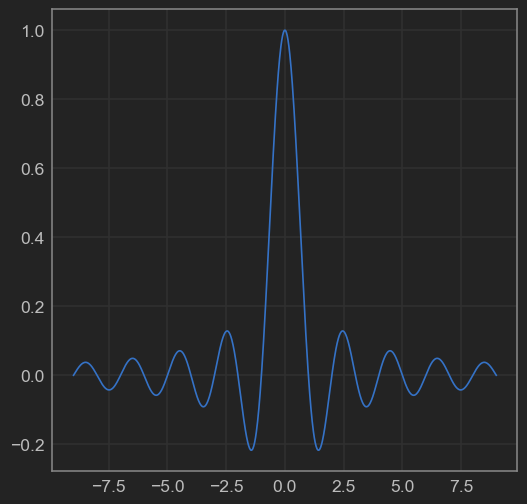

In [202]:
fig, ax = plt.subplots(figsize = (6, 6))

x = np.linspace(-9, 9, 1000)

#gráficas
ax.plot(x, np.sinc(x))

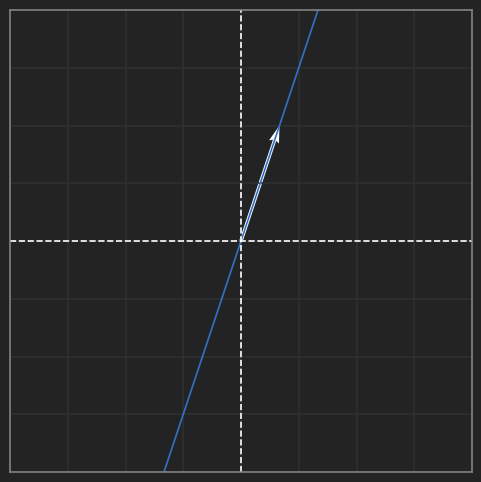

In [193]:
fig, ax = plt.subplots(figsize = (6, 6))

x = np.linspace(-1, 1, 100)

#gráficas
ax.plot(x, f(x))#, color = 'r', linestyle = ':', marker = 'p')
ax.quiver([0], [0], [v[0]], [v[1]], color = 'w', scale = 12)
ax.axvline(0, color = 'w', linestyle = '--')
ax.axhline(0, color = 'w', linestyle = '--')

#parametros
ax.set_aspect('equal')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xticklabels([])
ax.set_yticklabels([]);

In [181]:
dir(ax)

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spine

$$  T (\alpha \cdot \vec{x}) =  \lambda (\alpha \cdot \vec{x})$$
$$(\alpha \cdot \vec{x}) = \vec{y}$$
$$  T \vec{y} =  \lambda \vec{y}$$

<hr>
<h2>Vectores y valores propios</h2>

Los definiremos lo valores propios y vectores propios de una matriz cuadrada de la siguiente forma:

$$ T \vec{x} = \lambda \vec{x} $$

Estos vectores son los llamados _vectores propios_ de $T$ y el valor $\lambda$ que representa el factor de escalamiento del vector es llamado _valor propio_ de $T$. Podemos calcular los valores propios de una matriz cuadrada $T_n$ calculando primero el determinante de $T - \lambda I$, que dara como resultado un polinomio de grado $n$, y luego encontrando las raíces de dicho polinomio.



Empezaremos dando un sentido geométrico a los valores propios de una matriz cuadrada, pensemos por ejemplo en la matriz:

$$
T = 
\begin{bmatrix}
3 & 1\\
0 & 2\\
\end{bmatrix}
$$

Y veamos la como una transformación lineal

<img src="Transformación base canonica.gif" width = 400 height = 400>

Al fijarnos en u vector cualquiera vamos a fijarnos en su subespacio generado, es decir, en la recta que pasa sobre el:

<img src="Transformación sobre subespacio generado.gif" width = 400 height = 400>

Podemos ver que la transformación saca al vector de su subespacio. Sin embargo hay algunos vectores a los que esto no les pasa.

<img src="Transformación sobre un subespacio de un vector propio.gif" width = 400 height = 400>

Podemos ver que en el caso de esta matriz hay dos rectas sobre las cuales los vectores no son desviados, solo son escalados un factor $\lambda$. 

<img src="Transformación sobre un subespacio de un vector propio 2.gif" width = 400 height = 400>


Es decir, aplicar la matriz $T$ a uno de estos vectores da como resultado un multiplo escalar del mismo vector:




En Numpy dentro de _linalg_ tenemos las funciones _eig_ y _eigvals_ que nos ofrecen, devuelven una tupla con los valores propios, y otra de vectores propios para la primera, y un array de valores propios la segunda.


In [4]:
T = np.array([[3, 1], [0, 2]])
T

array([[3, 1],
       [0, 2]])

In [5]:
np.linalg.eigvals(T)

array([3., 2.])

In [9]:
val, vec = np.linalg.eig(T)

In [12]:
np.linalg.norm(vec[:, 1])

0.9999999999999999

$$\mathbb{R}^2$$

$$
i = 
\begin{bmatrix}
1 \\
0\\
\end{bmatrix}
$$


$$
j = 
\begin{bmatrix}
0 \\
1 \\
\end{bmatrix}
$$

$$
x = 
\begin{bmatrix}
x_1 \\
x_2\\
\end{bmatrix}$$

$$
\alpha
\begin{bmatrix}
1\\
0\\
\end{bmatrix}
+
\beta
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
= x
$$

Un resultado importante es que si $A_n$ tiene $n$ valores propios diferentes, entonces los vectores propios asociados a dichos valores son linealmente independientes, y podemos usarlos como una nueva base del espacio vectorial, que tiene la peculiaridad de que si vemos la matriz $A_n$ escrita en esa base, se convierte en una [matriz diagonal](#Glosario) que tiene en la diagonal los valores propios:

$$
D = 
\begin{bmatrix}
\lambda_1 & 0 & \cdots & 0\\
0 & \lambda_2 & \cdots & 0\\
\cdots & \cdots & \ddots & \cdots \\
0 & 0 & \cdots & \lambda_n\\
\end{bmatrix}
$$


Y esta matriz la podemos expresar como:

$$D = M^{-1}AM$$


Donde M es la matriz que tiene por columnas los vectores propios de A

In [14]:
A = np.random.randint(1, 10, (4, 4))

In [15]:
A

array([[4, 1, 1, 1],
       [4, 3, 1, 7],
       [9, 4, 9, 5],
       [6, 7, 4, 4]])

In [16]:
vals, vecs = np.linalg.eig(A)

In [17]:
vecs

array([[ 0.1356664 ,  0.69953725, -0.01965044,  0.01193657],
       [ 0.37833692, -0.17535057,  0.51798361, -0.72627862],
       [ 0.74741894, -0.62632399, -0.81035262, -0.04996202],
       [ 0.52898084, -0.29600349,  0.27319494,  0.68547843]])

In [19]:
D = np.linalg.inv(vecs) @ A @ vecs

In [20]:
D

array([[ 1.61971007e+01, -2.22044605e-15,  8.88178420e-16,
         8.88178420e-16],
       [ 1.11022302e-16,  2.43085117e+00, -2.08166817e-16,
        -2.22044605e-16],
       [ 3.10862447e-15, -1.11022302e-15,  4.97575788e+00,
         1.77635684e-15],
       [-6.66133815e-15,  2.66453526e-15,  5.55111512e-16,
        -3.60370978e+00]])

In [21]:
np.round(D, 3)

array([[16.197, -0.   ,  0.   ,  0.   ],
       [ 0.   ,  2.431, -0.   , -0.   ],
       [ 0.   , -0.   ,  4.976,  0.   ],
       [-0.   ,  0.   ,  0.   , -3.604]])

In [22]:
vals

array([16.19710073,  2.43085117,  4.97575788, -3.60370978])

<h2>Modelo de Leslie</h2>

Hay muchas formas de modelar el comportamiento de una población determinada, para mostrar cómo trabaja el modelo de Leslie vamos a dar un ejemplo. Imaginemos una población de insectos que tiene una esperanza de vida máxima de 4 años, los agruparemos en cuatro categorías:

|Edad(años)|Población|Tasa de natalidad (individuos por año)|Probabilidad de sobrevivir|
|:--------:|:--------|:------------------------------------:|:------------------------:|
|0-1       |   30    |0|0.7|
|1-2       |35       |4|0.5|
|2-3       | 25      |2|0.2|
|3-4       |10       |1|0.0|


cada categoría tiene su propia tasa de natalidad expresada en individuos nacidos por año y una probabilidad de sobrevivir y ascender a la siguiente categoría. Si queremos saber cuántos individuos tendrán edades entre 0 y 1 años después de un año, es decir todos los individuos que nacieron durante ese año, tendríamos que calcularlo de la siguiente manera:

- cada uno de los 30 individuos de la categoría _0-1_ tiene 0 descendientes, en total 30 * 0 = 0
- cada uno de los 35 individuos de la categoría _1-2_ tiene 4 descendientes, en total 35 * 4 = 140
- cada uno de los 25 individuos de la categoría _2-3_ tiene 2 descendientes, en total 25 * 2 = 50
- cada uno de los 10 individuos de la categoría _3-4_ tiene 1 descendientes, en total 10 * 1 = 10

Esto nos da un total de 200 nacidos en después de un año. Ahora imaginemos que queremos saber cuántos individuos entre 1 y 2 años de edad tendremos después de 1 año. En este caso haríamos lo siguiente:

- El 70% de los individuos de la primer categoría sobrevivieron para alcanzar la segunda, es decir:  30 * 0.7 = 21 

Este análisis se puede simplificar enormemente usando una matriz de Leslie, la matriz de Leslie es una matriz cuadrada, su primer renglón está formado por las tasas de natalidad de todas las categorías, los demás elementos son 0 excepto los elementos de la diagonal menor que contienen las probabilidades de supervivencia.

$$
L =
\begin{bmatrix}
0 & 4 & 2 & 1\\
0.7 & 0 & 0 & 0\\
0 & 0.5 & 0 & 0\\
0 & 0 & 0.2 & 0\\
\end{bmatrix}
$$

Esta matriz, junto con un vector columna con la población inicial de cada categoría, nos facilita mucho el análisis de la dinámica de la población. Sea $\vec{x_0}$ el vector de poblaciones iniciales:

$$
\vec{x_0} = 
\begin{bmatrix}
30\\
35\\
25\\
10
\end{bmatrix}
$$

Podemos calcular la población después de un año $\vec{x_1}$ haciendo $\vec{x_1} = L \vec{x_0}$

$$
\vec{x_1} = 
\begin{bmatrix}
0 & 4 & 2 & 1\\
0.7 & 0 & 0 & 0\\
0 & 0.5 & 0 & 0\\
0 & 0 & 0.2 & 0\\
\end{bmatrix}
\begin{bmatrix}
30\\
35\\
25\\
10
\end{bmatrix}
=
\begin{bmatrix}
200\\
21\\
17.5\\
5
\end{bmatrix}
$$

En general, conocer la población después de $n$ años simplemente lo hacemos calculando:

$$ \vec{x_n} = L^n \vec{x_0}$$


La matriz de Leslie tiene la propiedad de tener un único valor característico positivo $\lambda_1$ que representa la tasa de crecimiento de la población, si $\lambda_1 < 1$ la población disminuye y si $\lambda_1 > 1$ esta aumenta.





In [24]:
L = np.array([[0, 4, 2, 1], [0.7, 0, 0, 0], [0, 0.5, 0, 0], [0, 0, 0.2, 0]])

In [25]:
L

array([[0. , 4. , 2. , 1. ],
       [0.7, 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. ],
       [0. , 0. , 0.2, 0. ]])

In [26]:
x = np.array([30, 35, 25, 10])

In [28]:
L @ L @ L @ x

array([124. , 140. ,  10.5,   3.5])

In [32]:
Matrix(np.linalg.eigvals(L))

Matrix([
[                         1.79230295271384],
[                        -1.54119328165428],
[-0.125554835529783 + 0.0978637807690939*I],
[-0.125554835529783 - 0.0978637807690939*I]])

In [33]:
np.linalg.eigvals(L)

array([ 1.79230295+0.j        , -1.54119328+0.j        ,
       -0.12555484+0.09786378j, -0.12555484-0.09786378j])

In [34]:
def pob_leslie(n, L, x0):
    
    if n == 0:
        return x0
    elif n == 1:
        return L @ x0
    else:
        return L @ pob_leslie(n - 1, L, x0)

In [38]:
pob_leslie(3, L, x)

array([584.5,  86.8,  70. ,   2.1])

In [39]:
pob = [pob_leslie(i, L, x) for i in range(30)]

In [41]:
pob1 = [elem[0] for elem in pob]
pob2 = [elem[1] for elem in pob]
pob3 = [elem[2] for elem in pob]
pob4 = [elem[3] for elem in pob]

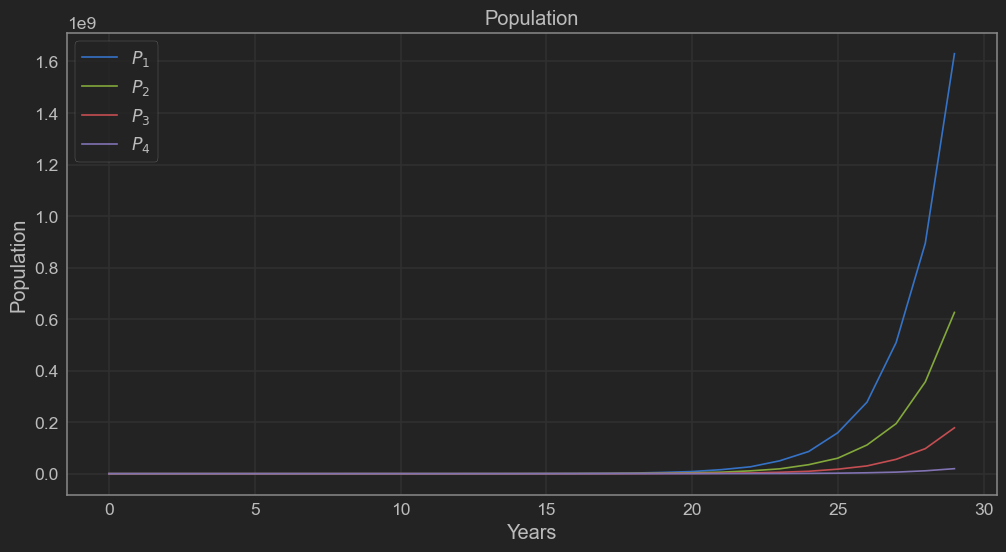

In [46]:
fig, ax = plt.subplots(figsize = (12, 6))

x = np.arange(0, 30)

for i, elem in enumerate([pob1, pob2, pob3, pob4]):
    ax.plot(x, elem, label = '$P_{}$'.format(i + 1))
    
ax.set_title("Population")
ax.set_xlabel('Years')
ax.set_ylabel('Population')
ax.legend();

In [43]:
list(enumerate([pob1, pob2, pob3, pob4]))

[(0,
  [30,
   200.0,
   124.0,
   584.5,
   489.29999999999995,
   1737.3999999999999,
   1787.8699999999997,
   5248.1449999999995,
   6256.466999999999,
   16067.932999999997,
   21316.959999999995,
   49737.10944999999,
   71372.99378999998,
   155310.53376999998,
   236152.5464269999,
   488312.1878704999,
   774940.6131998997,
   1543452.6459001997,
   2528182.926718959,
   4898307.690911423,
   8213574.889867217,
   15593031.26846827,
   26603797.88013653,
   49752871.51298201,
   85980706.19460078,
   159022210.94123796,
   277435253.2555791,
   508931385.97759557,
   894152906.2081101,
   1630344112.7820594]),
 (1,
  [35,
   21.0,
   140.0,
   86.8,
   409.15,
   342.50999999999993,
   1216.1799999999998,
   1251.5089999999998,
   3673.701499999999,
   4379.526899999999,
   11247.553099999997,
   14921.871999999996,
   34815.97661499999,
   49961.09565299998,
   108717.37363899998,
   165306.78249889993,
   341818.53150934994,
   542458.4292399298,
   1080416.8521301397,
   17

#### Ejercicio

Use una matriz de Leslie para estudiar el comportamiento de la siguiente población en los próximos 50 años, genere una gráfica que permita ver el comportamiento de cada intervalo de edades de forma independiente y otro que permita ver el comportamiento global de la población.

- ¿La población crece sin medida?
- Después de 30 años, ¿Cuál es el sector más numeroso de la población?


|Edad(años)|Población inicial|Tasa de natalidad (individuos por año)|Probabilidad de sobrevivir|
|:--------:|:---------------:|:------------------------------------:|:------------------------:|
|0-5       |   100           |0|0.25|
|5-10      |60               |1|0.5 |
|10-15     | 20              |3|0.1 |
|15-20     |10               |2|0.0 |



<h2>Modelo de Leontief (input-output)</h2>

El método es utilizado para analizar las relaciones existentes entre diferentes sectores
de producción y consumo que forman parte de la economía de una nación aunque
en la actualidad puede ser usado en contextos más limitados, como por ejemplo,
grandes empresas.

El modelo supone que la economía a estudiar está formada por diferentes sectores
de producción y de servicios. Existe una demanda interna que se tiene que atender
y también una demanda externa que también hay que satisfacer.

Supongamos la tabla siguiente que representa a las necesidades de demanda interna:

|Producción/demanda|Agricultura|Manufactura|Servicios|Demanda Externa|Producción|
|:----------------:|:---------:|:---------:|:-------:|:-------------:|:--------:|
|Agricultura|600|400|1400|600|3000|
|Manufactura|1500|800|700|1000|4000|
|Servicios|900|2800|700|2600|7000|

Para conocer que tanto necesita cada industria de las demás para llevar a cabo su producción nos apoyaremos de la matriz tecnológica denotada como $A$, la definimos como sigue:

$$A = B X_p^{-1}$$

Donde $X_p$ es la matriz diagonal que tiene por elementos la producción.

$$
A = 
\begin{bmatrix}
600&400&1400\\
1500&800&700\\
900&2800&700\\
\end{bmatrix}
\begin{bmatrix}
\frac{1}{3000}&0&0\\
0&\frac{1}{4000}&0\\
0&0&\frac{1}{7000}\\
\end{bmatrix}
=
\begin{bmatrix}
0.2&0.1&0.2\\
0.5&0.2&0.1\\
0.3&0.7&0.1\\
\end{bmatrix}
$$


Noten que la matriz tecnológica cumple que la suma de los valores de cada columna no puede ser mayor que 1, es decir:

$$\sum_{i = 1}^{n} a_{ij} \leq 1$$


Cada columna de la matriz tecnológica representa la demanda interna de la industria para producir 1 unidad de cada industria, es decir, en este ejemplo la primera columna representa la demanda interna pata producir 1 unidad del sector Agricultura, pero si en lugar que querer producir una unidad queremos producir $x_A$ unidades, tendremos que multiplicar dicha columna por $x_A$. Supongamos que la producción de cada industria es $x_A$, $x_M$, y $x_S$, entonces la demanda interna total la podemos expresar como sigue:

$$
x_A
\begin{bmatrix}
0.2\\
0.5\\
0.3\\
\end{bmatrix}
+
x_M
\begin{bmatrix}
0.1\\
0.2\\
0.7\\
\end{bmatrix}
+
x_S
\begin{bmatrix}
0.2\\
0.1\\
0.1\\
\end{bmatrix}
$$

Que podemos expresar como un producto matricial de la siguiente forma:

$$
\begin{bmatrix}
0.2&0.1&0.2\\
0.5&0.2&0.1\\
0.3&0.7&0.1\\
\end{bmatrix}
\begin{bmatrix}
x_A\\
x_M\\
x_S\\
\end{bmatrix}
= AX
$$



A dicho producto lo llamaremos demanda interna. Ahora notemos que la producción total de las industrias debe de cubrir la demanda interna y la demanda externa al mismo tiempo, es decir:

$$X = AX + D$$

Esta es la ecuación de Leontief y al resolverla para $X$ podemos saber cual es la producción necesaria para cubrir una cierta demanda externa $D$.

$$X - AX = D$$
$$(I - A)X = D$$

A la matriz $(I - A)$ se le conoce como matriz de Leontief, y si dicha matriz tiene inversa entonces podemos resolver la ecuación como:

$$X = (I - A)^{-1}D$$

<h3>Ejercicio</h3>


- Generar una DF de 10 filas y 12 columnas, las filas representarán 10 industrias $I_n$, las columnas serán las 10 industrias, la demanda externa y la producción total, generar de forma aleatoria los valores de la tabla (las unidades de consumo de cada industria, la demanda externa y la producción total, recordando que la suma de las columnas no puede ser mayor que la producción total de cada empresa).

- Obtener la matriz tecnológica del DF anterior

- Suponga que en un estudio de mercado se determina que la demanda externa de las industrias va a cambiar según se expresa en el siguiente vector:

$$
\begin{bmatrix}
1.1\\
0.3\\
1.6\\
1.0\\
0.7\\
0.5\\
3.9\\
1.2\\
0.1\\
2.4\\
\end{bmatrix}
$$

- obtener el vector de producción necesario para cumplir con la proyección